In [1]:
from thymiodirect import Thymio, Connection
import time
import math
import ThymioUtils

In [2]:
port = Connection.serial_default_port()

In [3]:
# Connect to Thymio and store id in variable

th = Thymio(serial_port = port, on_connect = lambda id: print (f"{id} is connected"))
th.connect()
id_thymio = th.first_node()

34241 is connected


In [4]:
th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0
th[id_thymio]["leds.top"] = [0, 0, 0]

## Exercise 1




In [ ]:
th[id_thymio]["motor.left.target"] = 300
th[id_thymio]["motor.right.target"] = 300

time.sleep(20)

th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

## Exercise 2

#### Circle (Left Turn)

In [ ]:
# in mm
r = 200
# in mm per second
v = 90
v_inner, v_outer = ThymioUtils.curve_velocity(r, v)

th[id_thymio]["leds.top"] = [32, 0, 0]
th[id_thymio]["motor.left.target"] = v_inner
th[id_thymio]["motor.right.target"] = v_outer

time.sleep(ThymioUtils.time_for_circle(r, v))

th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

time.sleep(0.5)

#### Circle (Right Turn)

In [ ]:
th[id_thymio]["leds.top"] = [0, 32, 0]
th[id_thymio]["motor.left.target"] = v_outer
th[id_thymio]["motor.right.target"] = v_inner

time.sleep(ThymioUtils.time_for_circle(r, v))

th[id_thymio]["leds.top"] = [32, 32, 32]
th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

In [16]:
# in mm
r = 200
# in mm per second
v = 90
v_inner, v_outer = ThymioUtils.curve_velocity(r, v)

th[id_thymio]["leds.top"] = [32, 0, 0]
th[id_thymio]["motor.left.target"] = v_inner
th[id_thymio]["motor.right.target"] = v_outer

time.sleep(ThymioUtils.time_for_circle(r, v))

th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

time.sleep(0.5)

th[id_thymio]["leds.top"] = [0, 32, 0]
th[id_thymio]["motor.left.target"] = v_outer
th[id_thymio]["motor.right.target"] = v_inner

time.sleep(ThymioUtils.time_for_circle(r, v))

th[id_thymio]["leds.top"] = [32, 32, 32]
th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

Task exception was never retrieved
future: <Task finished name='Task-116' coro=<Connection.handle_message.<locals>.do_refresh() done, defined at C:\Users\timon\.conda\envs\robo-thymio\lib\site-packages\thymiodirect\connection.py:451> exception=KeyError(34241)>
Traceback (most recent call last):
  File "C:\Users\timon\.conda\envs\robo-thymio\lib\site-packages\thymiodirect\connection.py", line 458, in do_refresh
    self.get_variables(source_node)
  File "C:\Users\timon\.conda\envs\robo-thymio\lib\site-packages\thymiodirect\connection.py", line 571, in get_variables
    chunk_length = (self.get_target_node_var_total_size(target_node_id)
  File "C:\Users\timon\.conda\envs\robo-thymio\lib\site-packages\thymiodirect\connection.py", line 536, in get_target_node_var_total_size
    return self.remote_nodes[target_node_id].var_total_size
KeyError: 34241


34241 is connected


## Exercise 3

In [15]:
# in mm
r = 200
# in mm per second
v = 90
v_thymio = ThymioUtils.mms_to_thymio(v)
v_inner, v_outer = ThymioUtils.curve_velocity(r, v)

## Three-quarter Circle (A - B)
th[id_thymio]["leds.top"] = [32, 0, 0]
th[id_thymio]["motor.left.target"] = v_inner
th[id_thymio]["motor.right.target"] = v_outer

time.sleep((ThymioUtils.time_for_circle(r, v, 270))

th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

time.sleep(0.5)

## Straight (B - C)
th[id_thymio]["leds.top"] = [32, 32, 0]
th[id_thymio]["motor.left.target"] = v_thymio
th[id_thymio]["motor.right.target"] = v_thymio

time.sleep(ThymioUtils.time_for_distance(2 * r, v))

th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

time.sleep(0.5)

## Three-quarter Circle (C - D) 
th[id_thymio]["leds.top"] = [32, 32, 0]
th[id_thymio]["motor.left.target"] = v_outer
th[id_thymio]["motor.right.target"] = v_inner

time.sleep((ThymioUtils.time_for_circle(r, v, 270))

th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

time.sleep(0.5)

## Straight (D - A)
th[id_thymio]["leds.top"] = [0, 0, 32]
th[id_thymio]["motor.left.target"] = v_thymio
th[id_thymio]["motor.right.target"] = v_thymio

time.sleep(ThymioUtils.time_for_distance(2 * r, v))

th[id_thymio]["motor.left.target"] = 0
th[id_thymio]["motor.right.target"] = 0

## Exercise 4

## Exercise 8

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin

In [148]:
def x(t):
    return 10*t

def y(t):
    return 0.8*((t-20)**2)

def c(t):
    x_coord = x(t)
    y_coord = y(t)
    return np.array([x_coord, y_coord])

def c1(t):
    h = 1E-8
    return (c(t+h)-c(t))/h

def rotate_vec_90(v):
    theta = np.deg2rad(90)

    rot = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    return np.dot(rot, v)

def rotate_vec_270(v):
    theta = np.deg2rad(270)

    rot = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    return np.dot(rot, v)

In [140]:
def plot_tangents(times):
    for time in times:
        s1 = c(time)
        p1 = c1(time)
        ax.arrow(s1[0], s1[1], p1[0], p1[1])
        
def plot_tangents_rotated(times):
    for time in times:
        s1 = c(time)
        p1 = rotate_vec_90(c1(time)/np.linalg.norm(c1(time)) * 48)
        p2 = rotate_vec_270(c1(time)/np.linalg.norm(c1(time)) * 48)
        ax.arrow(s1[0], s1[1], p1[0], p1[1])
        ax.arrow(s1[0], s1[1], p2[0], p2[1])

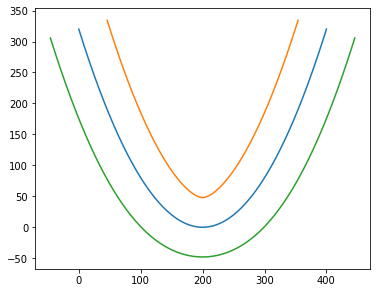

In [151]:
x_values = []
y_values = []
x_lefts = []
y_lefts = []
x_rights = []
y_rights = []


for i in range(4001):
    t = i/100
    x_value, y_value = c(t)
    x_left, y_left = rotate_vec_90(c1(t)/np.linalg.norm(c1(t)) * 48)
    x_right, y_right = rotate_vec_270(c1(t)/np.linalg.norm(c1(t)) * 48)
    x_values.append(x_value)
    y_values.append(y_value)
    x_lefts.append(x_value + x_left)
    y_lefts.append(y_value + y_left)
    x_rights.append(x_value + x_right)
    y_rights.append(y_value + y_right)
    
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', 'box')
    
ax.plot(x_values, y_values)
ax.plot(x_lefts, y_lefts)
ax.plot(x_rights, y_rights)
#plot_tangents([0, 5, 10, 15, 20, 25, 30, 35, 40])
#plot_tangents_rotated([0, 5, 10, 15, 20, 25, 30, 35, 40])

In [81]:
tangent_20 = c1(20)/np.linalg.norm(c1(20))

In [88]:
rotate_vec(tangent_20)

[1.999999881263688e-09, -1.0]

[ 1.9999997e-09 -1.0000000e+00]


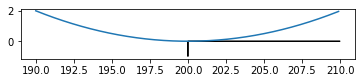

In [122]:
x_values = []
y_values = []
x_tangs = []
y_tangs = []

for i in range(1900, 2100):
    t = i/100
    x_value, y_value = c(t)
    x_values.append(x_value)
    y_values.append(y_value)
    
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
    
ax.plot(x_values, y_values)
plot_tangents([20])
plot_tangents_rotated([20])

In [39]:
c1(20)

array([5.00000112e+00, 1.00000017e-08])

## Appendix


In [ ]:
def mms_to_thymio(v):
    v_thymio = v * 3.3
    return min(math.floor(v_thymio), 400)

def curve_velocity(r, v):
    w = v / r
    v_inner = w * (r - 105/2)
    v_outer = w * (r + 105/2)
    return mms_to_thymio(v_inner), mms_to_thymio(v_outer)

def time_for_distance(d, v):
    return d / v;

def time_for_circle(r, v):
    return time_for_distance(2 * r * math.pi, v);